In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train16 = pd.read_csv("zillow_data/train_2016_v2.csv", parse_dates=["transactiondate"])
print(train16.shape)
train16.tail()

(90275, 3)


,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [3]:
property16 = pd.read_csv("zillow_data/properties_2016.csv")
print(property16.shape)
property16.tail()

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fireplacecnt & Fireplaceflag in Proprerites

- fireplacecnt의 89.5%의 값이 빈 값이다.
- fireplaceflag의 99.8%의 값이 빈 값이다.
- 두 값 모두 채워져 있는 튜플이 없기 때문에 서로의 값을 이용해서 채울 수 있는 값은 없다.

In [5]:
fire_prop16 = property16[["fireplacecnt", "fireplaceflag"]]
fire_prop16.tail()

,fireplacecnt,fireplaceflag
2985212,NaN,NaN
2985213,NaN,NaN
2985214,NaN,NaN
2985215,NaN,NaN
2985216,NaN,NaN


,column_name,missing_count
0,fireplacecnt,2672580
1,fireplaceflag,2980054


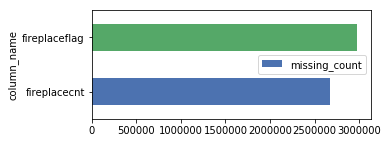

In [9]:
missing_fire16 = fire_prop16.isnull().sum(axis=0).reset_index()
missing_fire16.columns = ['column_name', 'missing_count']
missing_fire16 = missing_fire16.sort_values(by='missing_count')

fig, ax2 = pyplot.subplots(figsize=(5,2))
missing_fire16.plot("column_name", "missing_count", kind="barh", color=sns.color_palette("deep", 3), ax=ax2)

missing_fire16

In [11]:
missing_fire16["nan_rate"] = missing_fire16["missing_count"] / len(property16)
missing_fire16

,column_name,missing_count,nan_rate
0,fireplacecnt,2672580,0.895272
1,fireplaceflag,2980054,0.998270


In [33]:
fire_prop16["fireplacecnt"].value_counts(), fire_prop16["fireplacecnt"].value_counts().sum()

(1.0    269643
 2.0     34407
 3.0      7696
 4.0       710
 5.0       126
 6.0        32
 7.0        15
 9.0         6
 8.0         2
 Name: fireplacecnt, dtype: int64, 312637)

In [13]:
fire_prop16["fireplaceflag"].value_counts()

True    5163
Name: fireplaceflag, dtype: int64

In [31]:
fire_prop16[~np.isnan(fire_prop16["fireplacecnt"])].isna().sum()

fireplacecnt          0
fireplaceflag    312637
dtype: int64

## Fireplacecnt & Fireplaceflag with Logerror

In [59]:
new_train16 = train16.set_index('parcelid').join(property16.set_index('parcelid'))
new_train16.head()

,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,2016-08-02,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,...,NaN,NaN,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13
10711755,-0.0182,2016-08-02,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,NaN,NaN,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13
10711805,-0.1009,2016-05-03,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13
10711816,-0.0121,2016-04-05,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13
10711858,-0.0481,2016-07-15,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13


### model - 1
- Fireplacecnt, Fireplaceflag의 빈값을 모두 0.0으로 채운 카테고리화 하여 모델링

In [60]:
new_train16["fireplaceflag"] = new_train16["fireplaceflag"].astype(float) # True/False -> 1.0/0.0

In [61]:
new_train16.loc[np.isnan(new_train16["fireplacecnt"]), "fireplacecnt"] = 0.0
new_train16.loc[np.isnan(new_train16["fireplaceflag"]), "fireplaceflag"] = 0.0
new_train16[["fireplacecnt", "fireplaceflag"]].isna().sum()

fireplacecnt     0
fireplaceflag    0
dtype: int64

In [62]:
df = new_train16[["fireplacecnt", "fireplaceflag", "logerror"]]
df[["fireplacecnt", "fireplaceflag"]].astype('category')
df.head()

,fireplacecnt,fireplaceflag,logerror
parcelid,,,
10711738,0.0,0.0,0.0276
10711755,0.0,0.0,-0.0182
10711805,0.0,0.0,-0.1009
10711816,0.0,0.0,-0.0121
10711858,0.0,0.0,-0.0481


In [63]:
model_hvac16 = sm.OLS.from_formula("logerror ~  C(fireplacecnt) + C(fireplaceflag)",df)
result_hvac16 = model_hvac16.fit()
print(result_hvac16.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.833
Date:                Mon, 02 Jul 2018   Prob (F-statistic):             0.0884
Time:                        23:53:35   Log-Likelihood:                 36741.
No. Observations:               90275   AIC:                        -7.347e+04
Df Residuals:                   90268   BIC:                        -7.340e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### model - 2 
- Fireplacecnt, Fireplaceflag의 모두 있다/없다(1.0/0.0)로 모델링

In [66]:
new_train16 = train16.set_index('parcelid').join(property16.set_index('parcelid'))
new_train16.head()

,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,2016-08-02,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,...,NaN,NaN,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13
10711755,-0.0182,2016-08-02,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,NaN,NaN,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13
10711805,-0.1009,2016-05-03,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13
10711816,-0.0121,2016-04-05,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13
10711858,-0.0481,2016-07-15,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13


In [67]:
new_train16["fireplaceflag"] = new_train16["fireplaceflag"].astype(float) # True/False -> 1.0/0.0

In [68]:
new_train16.loc[~np.isnan(new_train16["fireplacecnt"]), "fireplacecnt"] = 1.0
new_train16.loc[~np.isnan(new_train16["fireplaceflag"]) , "fireplaceflag"] = 1.0
new_train16.loc[np.isnan(new_train16["fireplacecnt"]), "fireplacecnt"] = 0.0
new_train16.loc[np.isnan(new_train16["fireplaceflag"]), "fireplaceflag"] = 0.0

new_train16[["fireplacecnt", "fireplaceflag"]].isna().sum()

fireplacecnt     0
fireplaceflag    0
dtype: int64

In [69]:
dfX0 = new_train16[["fireplacecnt", "fireplaceflag"]]
dfX = sm.add_constant(dfX0)
dfy = new_train16[["logerror"]]
df = pd.concat([dfX, dfy], axis=1)

In [70]:
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8906
Date:                Mon, 02 Jul 2018   Prob (F-statistic):              0.410
Time:                        23:55:43   Log-Likelihood:                 36736.
No. Observations:               90275   AIC:                        -7.347e+04
Df Residuals:                   90272   BIC:                        -7.344e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0112      0.001     19.737

## Visualization

#### original

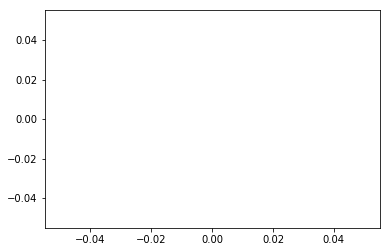

In [57]:
pyplot.scatter(fire_prop16["fireplacecnt"], fire_prop16["fireplaceflag"])

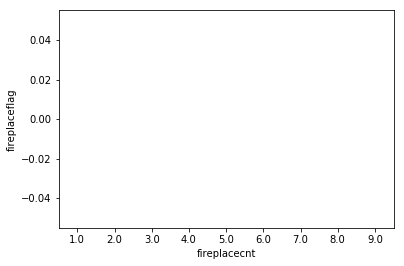

In [58]:
sns.stripplot(x="fireplacecnt", y="fireplaceflag", data=fire_prop16, jitter=True, color="0.4")

#### model - 1

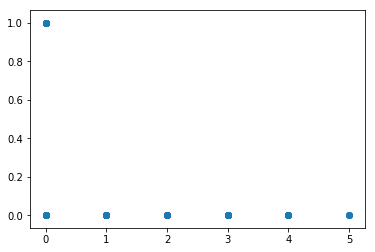

In [64]:
pyplot.scatter(new_train16["fireplacecnt"], new_train16["fireplaceflag"])

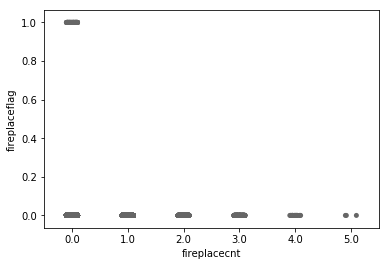

In [65]:
sns.stripplot(x="fireplacecnt", y="fireplaceflag", data=new_train16, jitter=True, color="0.4")

#### model - 2 

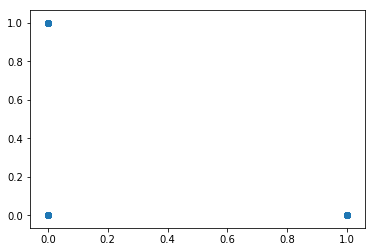

In [72]:
pyplot.scatter(new_train16["fireplacecnt"], new_train16["fireplaceflag"])

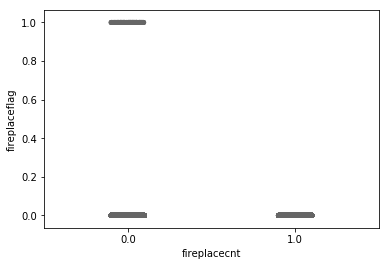

In [73]:
sns.stripplot(x="fireplacecnt", y="fireplaceflag", data=new_train16, jitter=True, color="0.4")